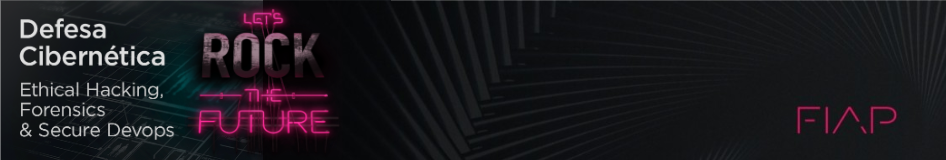

> * __Disciplina: Artificial Intelligence & Machine Learning__
* Nícolas Miguel Bittencourt Tanajura:
  * [Linkedin](https://www.linkedin.com/in/nicolas-tanajura/)
  * Checkpoint 1
  

**1. Carregando a base de dados de dados do GitHub e selecionando as amostras**

In [20]:
# Importando as bibliotecas necessárias
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/NBittent/disciplina_ia_c1_2024/main/csvs/urls_phishing_checkpoint1.csv')

# Dividir o DataFrame em dois subconjuntos
# 1 indica phishing e 0 indica legítima
df_phishing = df[df['phishing'] == 1]
df_legit = df[df['phishing'] == 0]

# Definir a semente para amostragem
random_state = 2048

# Selecionar uma amostra de 4000 observações
sample_phishing = df_phishing.sample(n=2000, random_state=random_state)
sample_legit = df_legit.sample(n=2000, random_state=random_state)

# Concatenar as duas amostras
sample_df = pd.concat([sample_phishing, sample_legit])

# Exibir as primeiras linhas da amostra
sample_df.head()


,urls,phishing,domain,ip,at,length_url,depth_url,double_slash,http_https,shortening_services,hyphen,dns,age_domain,end_period_domain,country
2812,https://us-usps-addio.top/,1,us-usps-addio.top,1,0,26,1,0,0,0,1,1,0.0,2025-08,Australia
250,https://identifiez-vous250.godaddysites.com/,1,identifiez-vous250.godaddysites.com,1,0,44,1,0,0,0,1,1,10.0,2032-11,South_Africa
2492,https://chrme-metsmsk-usa.gitbook.io/us,1,chrme-metsmsk-usa.gitbook.io,1,0,39,1,0,0,0,1,1,10.0,2025-03,Canada
2241,https://new.express.adobe.com/webpage/fLs7ZQKV...,1,new.express.adobe.com,1,0,51,2,0,0,0,0,1,37.0,2025-05,Brazil
4814,https://pub-1c7d9f20b0c64111bcabf468daf0bec6.r...,1,pub-1c7d9f20b0c64111bcabf468daf0bec6.r2.dev,1,0,71,1,0,0,0,1,1,2.0,2025-08,Mexico


**2. Realizando o EDA da variável "depth_url" e analisando os dados.**

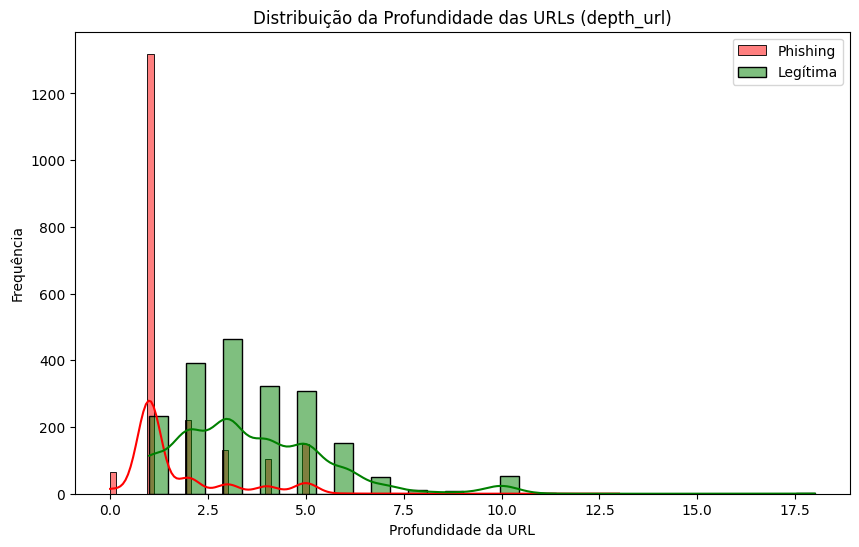

Phishing URLs
count    2000.000000
mean        1.701500
std         1.366137
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: depth_url, dtype: float64
1.0

Legitimate URLs
count    2000.000000
mean        3.622000
std         1.971563
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        18.000000
Name: depth_url, dtype: float64
3.0


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analisando a variável "depth_url" para URLs de phishing
plt.figure(figsize=(10, 6))
sns.histplot(sample_phishing['depth_url'], kde=True, color='red', label='Phishing')
sns.histplot(sample_legit['depth_url'], kde=True, color='green', label='Legítima')
plt.title('Distribuição da Profundidade das URLs (depth_url)')
plt.xlabel('Profundidade da URL')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Exibir estatísticas descritivas da variável "depth_url" para ambos os subconjuntos
print("Phishing URLs")
print(sample_phishing['depth_url'].describe())
print(sample_phishing['depth_url'].median())
print("\nLegitimate URLs")
print(sample_legit['depth_url'].describe())
print(sample_legit['depth_url'].median())



In [9]:
# Carregar o arquivo não rotulado
df_not_label = pd.read_csv('https://raw.githubusercontent.com/NBittent/disciplina_ia_c1_2024/main/csvs/urls_phishing_checkpoint1_not_label.csv')

# Contar a frequência de domínios no dataset
domain_counts = df_not_label['domain'].value_counts()

# Exibir os domínios com maior frequência
print(domain_counts.head(10))


domain
almardoof.com                                                                       1
bafybeicw5n36ionzo7ijatn32v2vwpyhsxm5wpmq2wcppwbohfmymdlu3y.ipfs.nftstorage.link    1
fazenda.gov.br                                                                      1
distractify.com                                                                     1
mylust.com                                                                          1
docs.google.com                                                                     1
campsite.bio                                                                        1
transxkvv.world                                                                     1
matemcskilpogin.gitbook.io                                                          1
utadc.com                                                                           1
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selecionar apenas a variável 'depth_url'
X = sample_df[['depth_url']]  # Mantemos apenas depth_url como variável
y = sample_df['phishing']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2048)

# Usar um modelo simples de árvore de decisão
clf = DecisionTreeClassifier(random_state=2048)
clf.fit(X_train, y_train)

# Fazer previsões
y_pred = clf.predict(X_test)

# Avaliar o modelo
print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Aplicar a previsão no dataset não rotulado
df_not_label['prediction'] = clf.predict(df_not_label[['depth_url']])

# Agrupar por domínio e calcular a precisão da previsão
domain_predictions = df_not_label.groupby('domain')['prediction'].agg(['sum', 'count'])
domain_predictions['accuracy'] = domain_predictions['sum'] / domain_predictions['count']

# Filtrar os domínios com 80% ou mais de precisão
high_accuracy_domains = domain_predictions[domain_predictions['accuracy'] >= 0.8]

# Exibir os domínios com alta precisão
print(high_accuracy_domains)



Acurácia no conjunto de teste: 0.7908333333333334
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       617
           1       0.84      0.70      0.76       583

    accuracy                           0.79      1200
   macro avg       0.80      0.79      0.79      1200
weighted avg       0.80      0.79      0.79      1200

                                                    sum  count  accuracy
domain                                                                  
bafybeicw5n36ionzo7ijatn32v2vwpyhsxm5wpmq2wcppw...    1      1       1.0
campsite.bio                                          1      1       1.0
matemcskilpogin.gitbook.io                            1      1       1.0
onlineservice29.godaddysites.com                      1      1       1.0
pub-8a8ad399f4264bf38f48c230fff96aff.r2.dev           1      1       1.0
transxkvv.world                                       1      1       1.0
trytt12.weebly.com                     

# Recomendações
De acordo com as análises, os domínios com maior probabilidade de conter URLs de phishing (com 80% ou mais de acurácia) foram identificados e exibidos no código anterior.

Recomenda-se cautela ao acessar URLs desses domínios e, se possível, evitá-los.

Para mitigar ou prevenir o problema, algumas medidas podem ser tomadas, como:

* **Bloquear o acesso aos domínios suspeitos:** Utilize ferramentas de segurança como firewalls ou filtros de DNS para bloquear o acesso aos domínios identificados como suspeitos.

* **Implementar medidas de segurança adicionais:** Utilize software anti-phishing e anti-malware para detectar e bloquear ameaças.

* **Educar os usuários:** Treine os usuários para identificar e evitar ataques de phishing, como verificar a autenticidade de URLs, não clicar em links suspeitos e desconfiar de emails ou mensagens que solicitam informações pessoais.

* **Monitorar o tráfego de rede:** Monitore o tráfego de rede para identificar atividades suspeitas e tomar medidas proativas para bloquear ataques.

* **Manter os softwares atualizados:** Mantenha os softwares e sistemas operacionais atualizados com os patches de segurança mais recentes.

### Referências:

- Repositório GitHub: [disciplina_ia_c1_2024](https://github.com/NBittent/disciplina_ia_c1_2024)
  - [urls_phishing_checkpoint1.csv](https://raw.githubusercontent.com/NBittent/disciplina_ia_c1_2024/main/csvs/urls_phishing_checkpoint1.csv)
  - [urls_phishing_checkpoint1_not_label.csv](https://raw.githubusercontent.com/NBittent/disciplina_ia_c1_2024/main/csvs/urls_phishing_checkpoint1_not_label.csv)
- Pandas Documentation: https://pandas.pydata.org/
- Kaggle Dataset: https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning
